<a href="https://colab.research.google.com/github/rhemmati101/random-walk/blob/main/TCG_Pocket_Random_Walk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Simulate climbing from Poke Ball tier (145 points) to Master Ball tier (1450 points)
# Wins grant 10 points, losses take away 5 points
# From 145 to 710 range (Ultra Ball tier threshold), get 3 more points for each win in a row
MASTER_POINT_THRESHOLD: int = 1450
ULTRA_POINT_THRESHOLD: int = 710
POKE_POINT_THRESHOLD: int = 145
NUM_ITERATIONS: int = 500

winrates = np.arange(0.40, 1, 0.05)
avg_num_games_taken: list[float] = []

for winrate in winrates:
  num_games_taken: list[int] = []

  for i in range(NUM_ITERATIONS):
    game_count: int = 0
    curr_points: int = POKE_POINT_THRESHOLD
    winstreak: int = 0

    while(curr_points < MASTER_POINT_THRESHOLD):
      game_won: bool = np.random.choice([True, False], p=[winrate, 1-winrate])

      if(game_won):
        curr_points += 10
        winstreak += 1

        # winstreak bonus
        if(curr_points < ULTRA_POINT_THRESHOLD):
          curr_points += 3 * (winstreak - 1)

      else:
        if(curr_points >= POKE_POINT_THRESHOLD): #if below Poke Ball tier, don't lose points
          curr_points -= 5
        winstreak = 0


      game_count += 1

    num_games_taken.append(game_count)


  print(f"Simulating {NUM_ITERATIONS} iterations for winrate of {winrate:.2f}")
  print(f"Average number of battles taken: {np.mean(num_games_taken):.2f}")

  avg_num_games_taken.append(np.mean(num_games_taken))

Simulating 500 iterations for winrate of 0.40
Average number of battles taken: 1043.29
Simulating 500 iterations for winrate of 0.45
Average number of battles taken: 622.85
Simulating 500 iterations for winrate of 0.50
Average number of battles taken: 441.43
Simulating 500 iterations for winrate of 0.55
Average number of battles taken: 339.19
Simulating 500 iterations for winrate of 0.60
Average number of battles taken: 274.58
Simulating 500 iterations for winrate of 0.65
Average number of battles taken: 226.55
Simulating 500 iterations for winrate of 0.70
Average number of battles taken: 193.13
Simulating 500 iterations for winrate of 0.75
Average number of battles taken: 166.54
Simulating 500 iterations for winrate of 0.80
Average number of battles taken: 146.70
Simulating 500 iterations for winrate of 0.85
Average number of battles taken: 127.69
Simulating 500 iterations for winrate of 0.90
Average number of battles taken: 112.67
Simulating 500 iterations for winrate of 0.95
Average

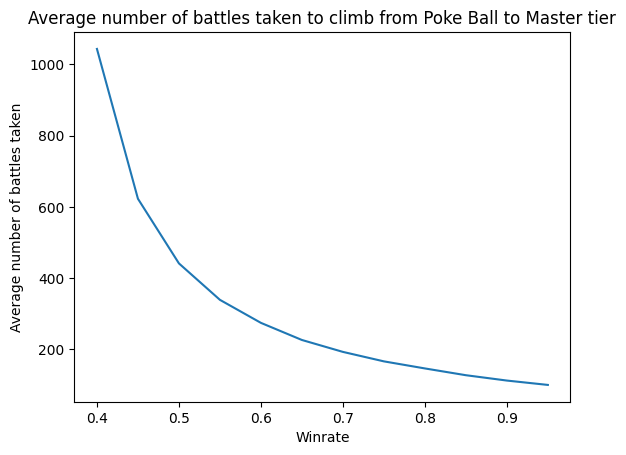

In [ ]:
plt.figure()
plt.plot(winrates, avg_num_games_taken)
plt.xlabel("Winrate")
plt.ylabel("Average number of battles taken")
plt.title("Average number of battles taken to climb from Poke Ball to Master tier")
plt.xticks(np.arange(0.4, 1, 0.1))
plt.show()